In [8]:
import tensorflow as tf

In [70]:
# explorar la data

In [71]:
from tensorflow.examples.tutorials.mnist import input_data

In [10]:
mnist = input_data.read_data_sets('/tmp/data',one_hot=True)

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [11]:
type(mnist)

tensorflow.contrib.learn.python.learn.datasets.base.Datasets

In [13]:
# Contiene todas las imagenes
mnist.train.images

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]], dtype=float32)

In [14]:
type(mnist.train.images)

numpy.ndarray

In [15]:
mnist.train.images.shape

(55000, 784)

In [16]:
# arriba: Hay 55000 imagenes, cada imagen esta compuesta por 784 puntos

In [17]:
# veamos una imagen

In [18]:
mnist.train.images[300]

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.  

In [21]:
# Cambiarla al tamaño origina
28*28

784

In [23]:
# Estos numeros representan la oscuridad del punto
mnist.train.images[30].reshape(28,28)

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.    

In [25]:
ejemplo = mnist.train.images[30].reshape(28,28)

In [27]:
import matplotlib.pyplot as plt

In [29]:
%matplotlib inline

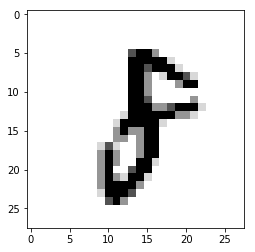

In [32]:
plt.imshow(ejemplo,cmap='Greys')

In [95]:
# Parametros para la red neuronal
# Que tan rapido ajustamos las funcion de costo
learning_rate = 0.001
# Cuantos ciclos de entrenamiento
training_epochs = 15
# tamaño de los datos de entranamiento
batch_size = 100

In [39]:
# parametros de la red neuronal
# 10 posibles salidas
n_classes = 10
# numero de ejemplos
n_samples = mnist.train.num_examples
# numero del tipo de entrada
n_input = 784

In [40]:
# numero de neuronas
n_hidden_1 = 256
n_hidden_2 = 256

In [72]:
# Construir la red neuronal
# Funcion del percepton

In [47]:
def multilayer_perceptron(x,weights,biases):
    '''
    x: Placeholder para la data de entrada
    weigths: diccionario de pesos 
    biases: diccionario de bias
    '''
    
    # Primera capa olculta
    # X * W + B
    layer_1 = tf.add(tf.matmul(x,weights['h1']),biases['b1'])
    # RELU(X * W + B) = f(x) = max(0,x)
    layer_1 = tf.nn.relu(layer_1)
    
    # Segunda capa oculta
    layer_2  = tf.add(tf.matmul(layer_1,weights['h2']),biases['b2'])
    layer_2 = tf.nn.relu(layer_2)
    
    # Ultima capa
    output_layer = tf.matmul(layer_2,weights['out']) + biases['out']
    
    return output_layer

In [49]:
weights =  {
    'h1':tf.Variable(tf.random_normal([n_input,n_hidden_1])),
    'h2':tf.Variable(tf.random_normal([n_hidden_1,n_hidden_2])),
    'out':tf.Variable(tf.random_normal([n_hidden_2,n_classes]))
}

In [50]:
bieases = {
    'b1':tf.Variable(tf.random_normal([n_hidden_1])),
    'b2':tf.Variable(tf.random_normal([n_hidden_2])),
    'out':tf.Variable(tf.random_normal([n_classes]))
}

In [51]:
x = tf.placeholder('float',[None,n_input])

In [52]:
y = tf.placeholder('float',[None,n_classes])

In [54]:
pred = multilayer_perceptron(x,weights,bieases)

In [57]:
# Funcion de optimizacion de costo
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(pred,y))
optimizer = tf.train.AdadeltaOptimizer(learning_rate=learning_rate).minimize(cost)

In [73]:
# Entrenar la red

In [82]:
# Retorna la imagen y su identificacion
xtemp,ytemp = mnist.train.next_batch(1)

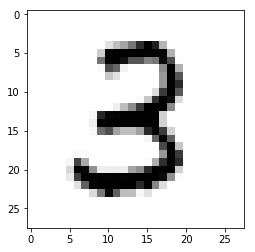

In [80]:
# Imagen
plt.imshow(xtemp.reshape(28,28),cmap='Greys')

In [83]:
# Identificacion
ytemp

array([[ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])

In [85]:
## Correr la sesion

In [86]:
sess = tf.InteractiveSession()

In [89]:
# inicializar variables del tensor

In [93]:
#init = tf.initialize_all_variables()
init = tf.global_variables_initializer()

In [94]:
sess.run(init)

In [97]:
for epoch in range(training_epochs):
    # Costo
    avg_cost = 0.0
    
    total_batch = int(n_samples/batch_size)
    print('total_batch :', total_batch)
    for i in range(total_batch):
        batch_x,batch_y = mnist.train.next_batch(batch_size)
        _,c = sess.run([optimizer,cost],feed_dict={x:batch_x,y:batch_y})
        avg_cost += c/total_batch
    
    print('Epoch: {} cost{:.4f}'.format(epoch+1,avg_cost))

print('Modelo ha terminado {} Epoch de entrenamiento'.format(training_epochs))

total_batch : 550
Epoch: 1 cost2334.6434
total_batch : 550
Epoch: 2 cost2294.4735
total_batch : 550
Epoch: 3 cost2249.5487
total_batch : 550
Epoch: 4 cost2203.4930
total_batch : 550
Epoch: 5 cost2155.7174
total_batch : 550
Epoch: 6 cost2109.1384
total_batch : 550
Epoch: 7 cost2063.0796
total_batch : 550
Epoch: 8 cost2017.1036
total_batch : 550
Epoch: 9 cost1972.3150
total_batch : 550
Epoch: 10 cost1928.4586
total_batch : 550
Epoch: 11 cost1885.1609
total_batch : 550
Epoch: 12 cost1843.6553
total_batch : 550
Epoch: 13 cost1802.8068
total_batch : 550
Epoch: 14 cost1763.0422
total_batch : 550
Epoch: 15 cost1724.7912
Modelo ha terminado 15 Epoch de entrenamiento


In [98]:
## Una vez entrenado debemos evaluarlo

In [99]:
correct_predictions = tf.equal(tf.argmax(pred,1),tf.argmax(y,1))

In [100]:
print(correct_predictions[0])

Tensor("strided_slice_2:0", shape=(), dtype=bool)


In [101]:
correct_predictions = tf.cast(correct_predictions,'float')

In [102]:
print(correct_predictions)

Tensor("Cast_1:0", shape=(?,), dtype=float32)


In [103]:
acc = tf.reduce_mean(correct_predictions)

In [104]:
type(acc)

tensorflow.python.framework.ops.Tensor

In [105]:
mnist.test.labels

array([[ 0.,  0.,  0., ...,  1.,  0.,  0.],
       [ 0.,  0.,  1., ...,  0.,  0.,  0.],
       [ 0.,  1.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [107]:
acc.eval({x:mnist.test.images,y:mnist.test.labels})

0.090599999